In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
data=pd.read_csv('C:/Users/marut/Desktop/LasVegasTripAdvisorReviews.csv',sep=';', lineterminator='\n')

### Task-1 Data Cleaning and Peparation

In [9]:
data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday\r
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday\r
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday\r
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday\r
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday\r
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday\r


In [10]:
data.shape

(504, 20)

In [19]:
data.head()

,User_country,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,No_of_rooms,User_continent,Member_years,Review_month,Review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [15]:
data.columns=data.columns.str.replace('\r','')

In [17]:
### Renaming the column names 
data=data.rename(columns={'User country':'User_country','Nr. reviews':'No_of_reviews','Nr. hotel reviews':'No_of_hotelreviews','Helpful votes':'Helpful_votes','Period of stay':'Period_of_stay','Traveler type':'Traveler_type','Tennis court':'Tennis_court','Free internet':'Free_internet','Hotel name':'Hotel_name','Hotel stars':'hotelstar','Nr. rooms':'No_of_rooms','User continent':'User_continent','Member years':'Member_years','Review month':'Review_month','Review weekday':'Review_weekday'})

In [18]:
data.Review_weekday=data.Review_weekday.str.replace('\r','')

In [20]:
data.columns

Index(['User_country', 'No_of_reviews', 'No_of_hotelreviews', 'Helpful_votes',
       'Score', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'hotelstar', 'No_of_rooms', 'User_continent', 'Member_years',
       'Review_month', 'Review_weekday'],
      dtype='object')

In [21]:
data.dtypes

User_country          object
No_of_reviews          int64
No_of_hotelreviews     int64
Helpful_votes          int64
Score                  int64
Period_of_stay        object
Traveler_type         object
Pool                  object
Gym                   object
Tennis_court          object
Spa                   object
Casino                object
Free_internet         object
Hotel_name            object
hotelstar             object
No_of_rooms            int64
User_continent        object
Member_years           int64
Review_month          object
Review_weekday        object
dtype: object

In [22]:
data.dtypes.unique()

array([dtype('O'), dtype('int64')], dtype=object)

### Seperating Categorical and Numeric variables

In [23]:
cont_variables=data.select_dtypes(include='int64')
cat_variables=data.select_dtypes(include=['O','object'])

In [24]:
cont_variables.describe()

,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,No_of_rooms,Member_years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [25]:
cat_variables.describe()

,User_country,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,User_continent,Review_month,Review_weekday
count,504,504,504,504,504,504,504,504,504,504,504,504,504,504
unique,48,4,5,2,2,2,2,2,2,21,5,6,12,7
top,USA,Mar-May,Couples,YES,YES,NO,YES,YES,YES,The Palazzo Resort Hotel Casino,5,North America,February,Wednesday
freq,217,128,214,480,480,384,384,456,480,24,192,295,42,85


In [26]:
cont_variables.isna().sum()

No_of_reviews         0
No_of_hotelreviews    0
Helpful_votes         0
Score                 0
No_of_rooms           0
Member_years          0
dtype: int64

In [27]:
cat_variables.isna().sum()

User_country      0
Period_of_stay    0
Traveler_type     0
Pool              0
Gym               0
Tennis_court      0
Spa               0
Casino            0
Free_internet     0
Hotel_name        0
hotelstar         0
User_continent    0
Review_month      0
Review_weekday    0
dtype: int64

In [28]:
cont_variables.Score.unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [29]:
cat_variables.columns

Index(['User_country', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'hotelstar', 'User_continent', 'Review_month', 'Review_weekday'],
      dtype='object')

<ipython-input-30-daf6f438e3fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_variables[col] = pd.to_numeric(cont_variables[col])


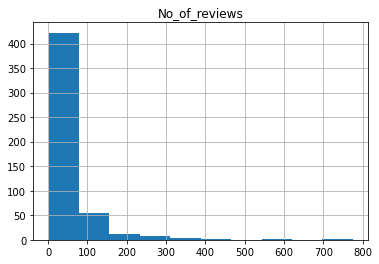

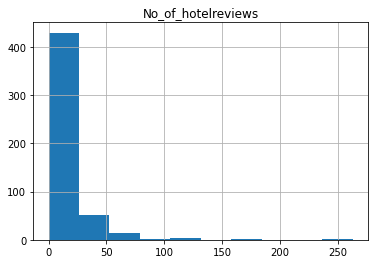

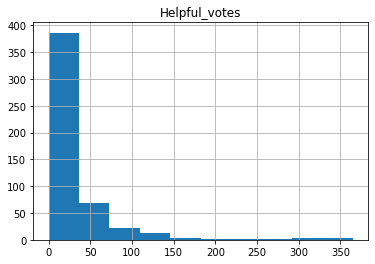

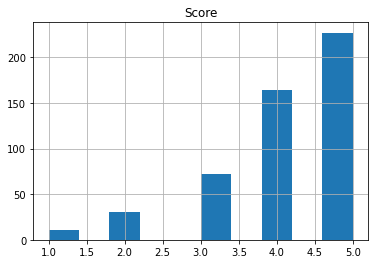

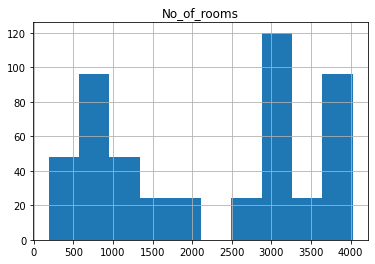

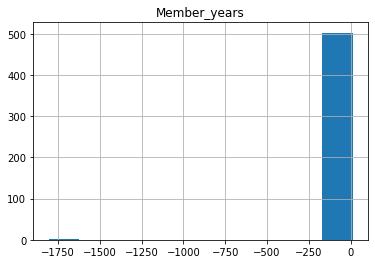

In [30]:
###Plotting histogram for all continous columns
for col in cont_variables.columns: 
    try:      
        cont_variables[col] = pd.to_numeric(cont_variables[col]) 
        cont_variables.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

In [31]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


cont_variables.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
No_of_reviews,504.0,0.0,24258.0,48.130952,23.5,74.996426,5.624464e+03,1.0,1.03,4.0,6.0,12.0,23.5,54.25,113.7,159.85,370.83,775.0
No_of_hotelreviews,504.0,0.0,8076.0,16.023810,9.0,23.957953,5.739835e+02,0.0,0.00,3.0,3.0,5.0,9.0,18.00,37.0,48.00,110.88,263.0
Helpful_votes,504.0,0.0,16003.0,31.751984,16.0,48.520783,2.354266e+03,0.0,1.00,2.0,3.0,8.0,16.0,35.00,71.7,112.85,298.04,365.0
Score,504.0,0.0,2078.0,4.123016,4.0,1.007302,1.014658e+00,1.0,1.00,2.0,3.0,4.0,4.0,5.00,5.0,5.00,5.00,5.0
No_of_rooms,504.0,0.0,1106976.0,2196.380952,2700.0,1285.476807,1.652451e+06,188.0,188.00,315.0,716.0,826.0,2700.0,3025.00,3933.0,3981.00,4027.00,4027.0
Member_years,504.0,0.0,387.0,0.767857,4.0,80.692897,6.511344e+03,-1806.0,0.00,0.0,1.0,2.0,4.0,6.00,8.7,10.00,11.00,13.0


In [38]:
cat_variables.columns

Index(['User_country', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'hotelstar', 'User_continent', 'Review_month', 'Review_weekday'],
      dtype='object')

In [33]:
cat_variables.User_country.unique()

array(['USA', 'UK', 'Canada', 'India', 'Australia', 'New Zeland',
       'Ireland', 'Egypt', 'Finland', 'Kenya', 'Jordan', 'Netherlands',
       'Syria', 'Scotland', 'South Africa', 'Swiss',
       'United Arab Emirates', 'Hungary', 'China', 'Greece', 'Mexico',
       'Croatia', 'Germany', 'Malaysia', 'Thailand', 'Phillippines',
       'Israel', 'India ', 'Belgium', 'Puerto Rico', 'Switzerland',
       'Norway', 'France', 'Spain', 'Singapore', 'Brazil', 'Costa Rica',
       'Iran', 'Saudi Arabia', 'Honduras', 'Denmark', 'Taiwan', 'Hawaii',
       'Kuwait', 'Czech Republic', 'Japan', 'Korea', 'Italy'],
      dtype=object)

In [34]:
### Converting the categorical columns to numeric

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_variables_encoded=cat_variables.apply(le.fit_transform)

In [39]:
cat_variables_encoded.columns
cat_variables_encoded=pd.DataFrame(cat_variables_encoded)

In [40]:
cont_variables=pd.DataFrame(cont_variables)

In [37]:
final_data=pd.concat([cont_variables,cat_variables_encoded],axis=1)

In [41]:
final_data.head()

,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,No_of_rooms,Member_years,User_country,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,User_continent,Review_month,Review_weekday
0,11,4,13,5,3773,9,46,0,3,0,1,0,0,1,1,2,0,3,4,4
1,119,21,75,3,3773,3,46,0,0,0,1,0,0,1,1,2,0,3,4,0
2,36,9,25,5,3773,2,46,2,2,0,1,0,0,1,1,2,0,3,3,2
3,14,7,14,4,3773,6,45,2,3,0,1,0,0,1,1,2,0,2,3,0
4,5,5,2,4,3773,7,3,2,4,0,1,0,0,1,1,2,0,3,7,5


In [42]:
###Seperating the target variable
#Extracting target and independent variables
X = final_data[final_data.columns.difference( ['Score'] )]
y = final_data['Score']

In [44]:
#SelectKbest
from sklearn.feature_selection import SelectKBest, f_classif
SKB = SelectKBest(f_classif, k=10).fit(X, y )

X.columns[SKB.get_support()]

Index(['Free_internet', 'Helpful_votes', 'Hotel_name', 'No_of_hotelreviews',
       'No_of_reviews', 'Pool', 'Review_month', 'Review_weekday',
       'User_continent', 'hotelstar'],
      dtype='object')

### Data Exploration

In [45]:
cont_variables.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_reviews,504.0,48.130952,74.996426,1.0,12.0,23.5,54.25,775.0
No_of_hotelreviews,504.0,16.023810,23.957953,0.0,5.0,9.0,18.00,263.0
Helpful_votes,504.0,31.751984,48.520783,0.0,8.0,16.0,35.00,365.0
Score,504.0,4.123016,1.007302,1.0,4.0,4.0,5.00,5.0
No_of_rooms,504.0,2196.380952,1285.476807,188.0,826.0,2700.0,3025.00,4027.0
Member_years,504.0,0.767857,80.692897,-1806.0,2.0,4.0,6.00,13.0


In [46]:
for i in cont_variables.columns:
    x = cont_variables[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print()

Column name is: No_of_reviews and it value is: 20     18
12     16
4      15
9      15
11     15
       ..
118     1
121     1
123     1
125     1
74      1
Name: No_of_reviews, Length: 139, dtype: int64

Column name is: No_of_hotelreviews and it value is: 3      53
7      34
4      33
6      32
5      31
       ..
56      1
26      1
49      1
44      1
162     1
Name: No_of_hotelreviews, Length: 64, dtype: int64

Column name is: Helpful_votes and it value is: 4      21
8      20
16     19
9      19
3      18
       ..
98      1
65      1
102     1
103     1
365     1
Name: Helpful_votes, Length: 109, dtype: int64

Column name is: Score and it value is: 5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

Column name is: No_of_rooms and it value is: 2034    24
787     24
2700    24
188     24
3773    24
1228    24
732     24
4027    24
1282    24
716     24
3348    24
3025    24
826     24
315     24
2884    24
3933    24
2916    24
3981    24
2959    24
3003    24


In [47]:
for column in cont_variables.columns:
     print("\n" + column)
     print(cont_variables[column].value_counts())


No_of_reviews
20     18
12     16
4      15
9      15
11     15
       ..
118     1
121     1
123     1
125     1
74      1
Name: No_of_reviews, Length: 139, dtype: int64

No_of_hotelreviews
3      53
7      34
4      33
6      32
5      31
       ..
56      1
26      1
49      1
44      1
162     1
Name: No_of_hotelreviews, Length: 64, dtype: int64

Helpful_votes
4      21
8      20
16     19
9      19
3      18
       ..
98      1
65      1
102     1
103     1
365     1
Name: Helpful_votes, Length: 109, dtype: int64

Score
5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

No_of_rooms
2034    24
787     24
2700    24
188     24
3773    24
1228    24
732     24
4027    24
1282    24
716     24
3348    24
3025    24
826     24
315     24
2884    24
3933    24
2916    24
3981    24
2959    24
3003    24
1467    24
Name: No_of_rooms, dtype: int64

Member_years
 3       63
 1       61
 5       60
 4       60
 2       55
 7       41
 6       41
 0       39
 8       32

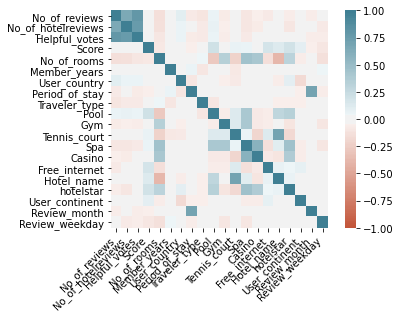

In [48]:
### Corelation matrix
corr = final_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

C:\Users\marut\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:404: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


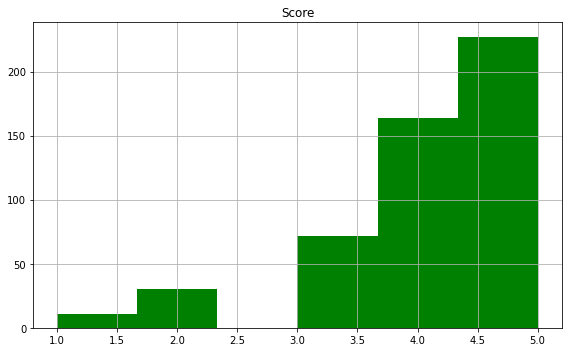

In [49]:
final_data[['Score']].hist(figsize=(8,5),bins=6,color='G')
plt.tight_layout()
plt.show()

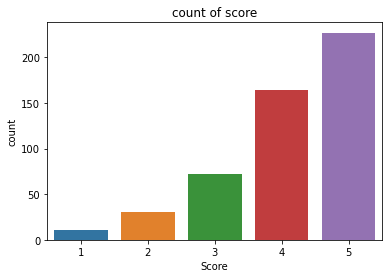

In [50]:
score = sns.countplot(x="Score", data=final_data).set_title('count of score')

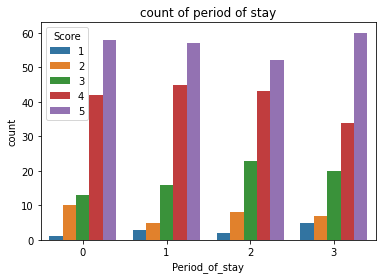

In [51]:
ax = sns.countplot(x="Period_of_stay", hue= "Score", data=final_data).set_title('count of period of stay')

In [52]:
data.Traveler_type.unique()

array(['Friends', 'Business', 'Families', 'Solo', 'Couples'], dtype=object)

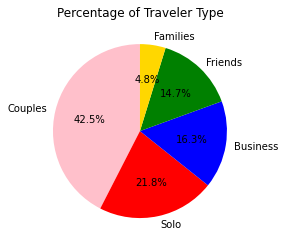

In [53]:
my_labels =  ['Couples', 'Solo', 'Business', 'Friends', 'Families']
my_colors = ['pink', 'red', 'blue', 'green', 'gold']
plt.pie(data.Traveler_type.value_counts(), labels= my_labels, colors=my_colors, autopct='%1.1f%%',startangle=90)
plt.title("Percentage of Traveler Type")
plt.show()


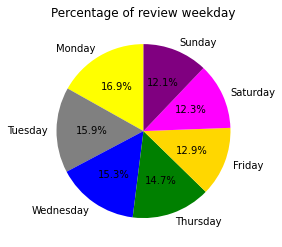

In [54]:
my_labels =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
my_colors = ['yellow', 'grey', 'blue', 'green', 'gold', 'magenta', 'purple']
plt.pie(data.Review_weekday.value_counts(), labels= my_labels, colors=my_colors, startangle=90, autopct='%.1f%%')
plt.title("Percentage of review weekday")
plt.show()


In [55]:
data.columns

Index(['User_country', 'No_of_reviews', 'No_of_hotelreviews', 'Helpful_votes',
       'Score', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'hotelstar', 'No_of_rooms', 'User_continent', 'Member_years',
       'Review_month', 'Review_weekday'],
      dtype='object')

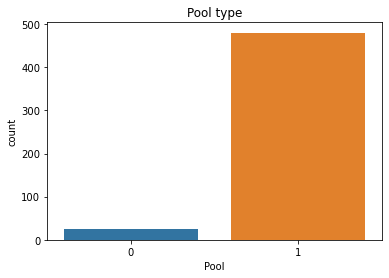

In [56]:
pool=sns.countplot(x='Pool',data=final_data).set_title('Pool type')

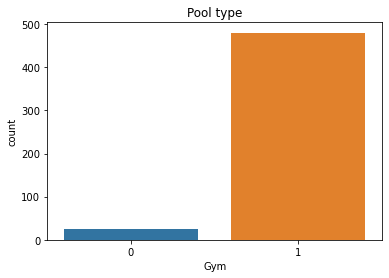

In [57]:
gym=sns.countplot(x='Gym',data=final_data).set_title('Pool type')

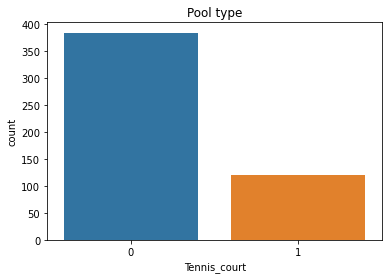

In [58]:
tennis_court=sns.countplot(x='Tennis_court',data=final_data).set_title('Pool type')

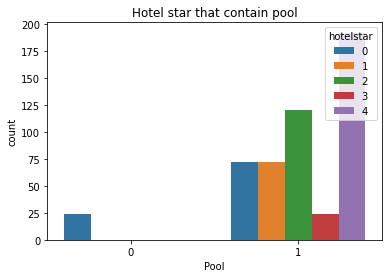

In [59]:
ax = sns.countplot(x="Pool", hue= "hotelstar", data=final_data).set_title('Hotel star that contain pool')

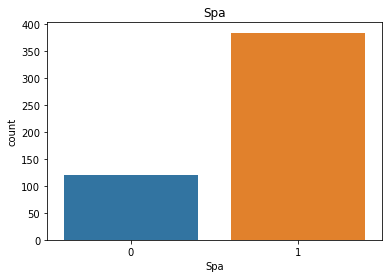

In [60]:
spa=sns.countplot(x='Spa',data=final_data).set_title('Spa')

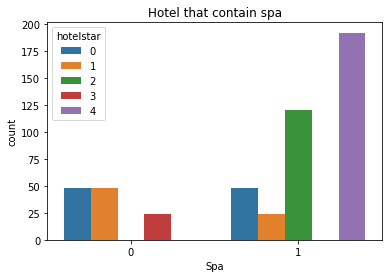

In [61]:
spa = sns.countplot(x="Spa", hue= "hotelstar", data=final_data).set_title('Hotel that contain spa')

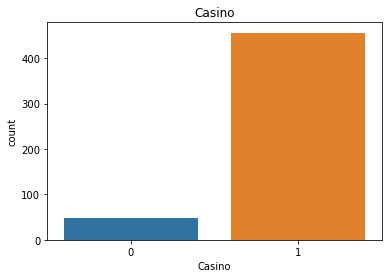

In [62]:
casino=sns.countplot(x='Casino',data=final_data).set_title('Casino')

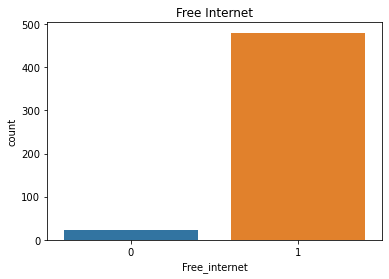

In [63]:
internt=sns.countplot(x='Free_internet',data=final_data).set_title('Free Internet')

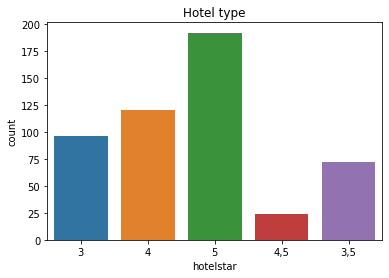

In [64]:
hotelstar=sns.countplot(x='hotelstar',data=data).set_title('Hotel type')

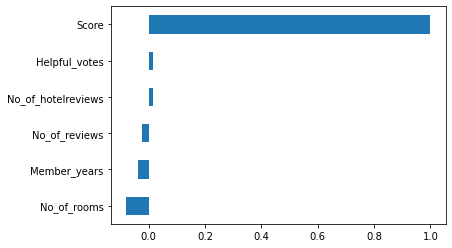

In [65]:
data.corr()['Score'].sort_values().plot(kind='barh')

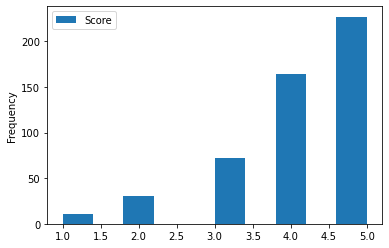

In [66]:
    final_data.plot.hist(x='hotelstar',y='Score')

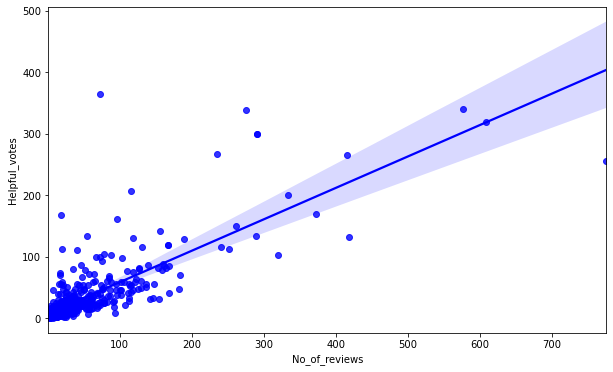

In [67]:
plt.figure(figsize=(10,6))
sns.regplot(x="No_of_reviews", y="Helpful_votes", data=final_data, color='blue')

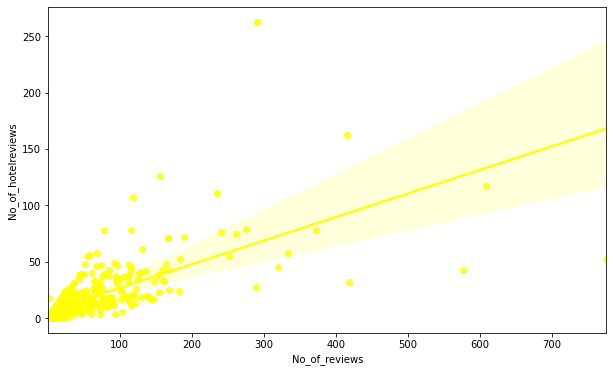

In [68]:
plt.figure(figsize=(10,6))
sns.regplot(x="No_of_reviews", y="No_of_hotelreviews", data=final_data, color='yellow')

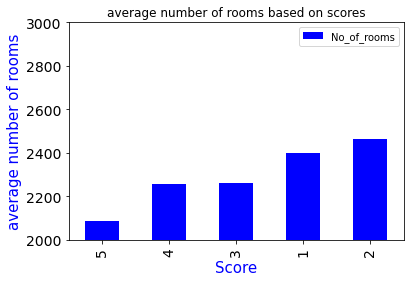

In [69]:
average = data[['No_of_rooms','Score']]
average.groupby("Score").mean().sort_values("No_of_rooms", ascending=True).plot.bar(color='blue', title='average number of rooms based on scores', fontsize = 14)
plt.xlabel('Score', fontsize=15, color='blue')
plt.ylabel('average number of rooms', fontsize=15, color='blue')
plt.ylim(2000,3000) 
plt.show()


Text(0.5, 0, 'score')

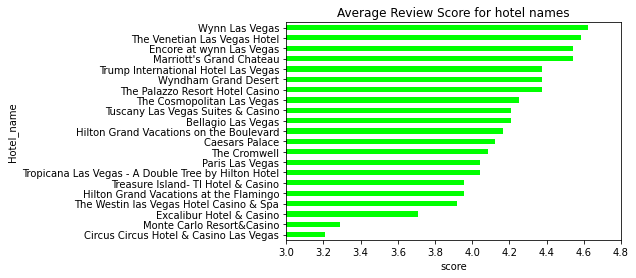

In [70]:
data.groupby("Hotel_name").Score.mean().sort_values(ascending=True).plot.barh(title='Average Review Score for hotel names', color='lime')
plt.xlim(3,4.8)
plt.xlabel("score")

(3.7, 4.4)

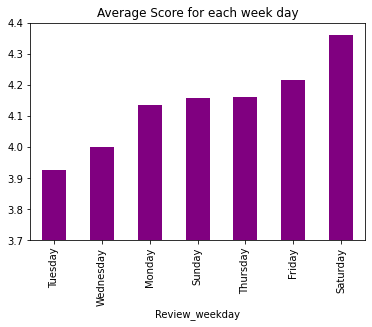

In [71]:
data.groupby("Review_weekday").Score.mean().sort_values().plot.bar(title='Average Score for each week day', color='purple')
plt.ylim(3.7,4.4)

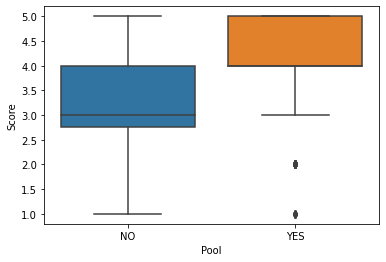

In [72]:
box = sns.boxplot(x="Pool", y="Score", data=data)


Text(0.5, 0, 'average number of reviews')

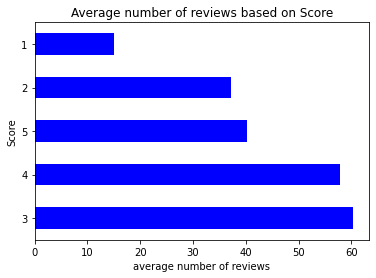

In [73]:
data.groupby("Score").No_of_reviews.mean().sort_values(ascending=False).plot.barh(title='Average number of reviews based on Score', color='blue')
plt.xlabel("average number of reviews")


### Data Modelling

In [74]:
###Seperating the target variable
#Extracting target and independent variables
x1 = final_data[final_data.columns.difference( ['Score'] )]
y1 = final_data['Score']
print(x1.shape)
print(y1.shape)

(504, 19)
(504,)


### Dividing the data into training and testing

### Suite3

In [75]:
train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.2,random_state=12)                                              

In [76]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

403
101
403
101


### RandomForest Classifier

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [79]:
param_grid={'n_estimators':np.arange(10,25)}

tree=GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_x,train_y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(warm_start=True),
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])})

In [80]:
tree.best_params_

{'n_estimators': 17}

In [81]:
# we can take n_estimators': 24
model = RandomForestClassifier(oob_score=True,n_estimators=24)
model.fit( train_x, train_y)

RandomForestClassifier(n_estimators=24, oob_score=True)

In [82]:
y_pred=model.predict(test_x)

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [84]:
classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(classificationreport)
print(confusionmatrix)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.25      0.08      0.12        12
           4       0.31      0.27      0.29        30
           5       0.58      0.82      0.68        50

    accuracy                           0.50       101
   macro avg       0.23      0.23      0.22       101
weighted avg       0.41      0.50      0.44       101

[[ 0  0  1  2  1]
 [ 0  0  0  1  4]
 [ 0  0  1  6  5]
 [ 0  0  2  8 20]
 [ 0  0  0  9 41]]


In [86]:
radm_clf_training_score = round(model.score(train_x, train_y)*100, 2)
radm_clf_testing_score = round(model.score(test_x, test_y)*100, 2)

In [87]:
print(radm_clf_training_score)
print(radm_clf_testing_score)

100.0
49.5


In [88]:
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


Training Accuracy : 1.0
Testing Accuracy : 0.49504950495049505


### Logistic Regression

In [89]:
Final_list=[#'Free_internet',
            'Helpful_votes', 
                'Hotel_name', 
            'No_of_hotelreviews',            
            'No_of_reviews',
            #'Pool',
            'Review_month', 
            'Review_weekday',
            #'User_continent',
            'hotelstar']

In [90]:
X_new = X[Final_list]

In [91]:
### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [92]:
vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
0,5.381304,Helpful_votes
3,3.838774,No_of_reviews
2,3.543224,No_of_hotelreviews
1,3.009816,Hotel_name
4,2.740281,Review_month
6,2.629978,hotelstar
5,2.623737,Review_weekday


In [93]:
data_final = pd.concat([X_new, y], axis=1)

In [94]:
#split the data into train & test
train, test = train_test_split(data_final, test_size=0.2, random_state=123)

In [95]:
#Univariate Regression
model = smf.mnlogit('Score~Helpful_votes+No_of_reviews+No_of_hotelreviews+Hotel_name+Review_month+hotelstar+Review_weekday', train).fit()

Optimization terminated successfully.
         Current function value: 1.165860
         Iterations 9


In [96]:
print(model.summary())

                          MNLogit Regression Results                          
Dep. Variable:                  Score   No. Observations:                  403
Model:                        MNLogit   Df Residuals:                      371
Method:                           MLE   Df Model:                           28
Date:                Sun, 18 Oct 2020   Pseudo R-squ.:                 0.07050
Time:                        16:58:04   Log-Likelihood:                -469.84
converged:                       True   LL-Null:                       -505.48
Covariance Type:            nonrobust   LLR p-value:                 1.236e-05
           Score=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.9922      1.575      1.265      0.206      -1.095       5.080
Helpful_votes         -0.0369      0.026     -1.414      0.157      -0.088       0.014
No_of_reviews       

In [97]:
model=LogisticRegression()

In [98]:
model.fit(train_x,train_y)

C:\Users\marut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
y_pred=model.predict(test_x)

In [100]:
classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
print(classificationreport)
print(confusionmatrix)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        12
           4       0.30      0.30      0.30        30
           5       0.50      0.70      0.58        50

    accuracy                           0.44       101
   macro avg       0.16      0.20      0.18       101
weighted avg       0.34      0.44      0.38       101

[[ 0  0  0  1  3]
 [ 0  0  0  2  3]
 [ 0  0  0  4  8]
 [ 0  0  0  9 21]
 [ 0  0  1 14 35]]


In [102]:
logistic_training_score = round(model.score(train_x, train_y)*100, 2)
logistic_testing_score = round(model.score(test_x, test_y)*100, 2)

In [103]:
print(logistic_training_score)
print(logistic_testing_score)

45.91
43.56


In [104]:
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


Training Accuracy : 0.45905707196029777
Testing Accuracy : 0.43564356435643564


RF 0.4143827160493827
LG 0.4541666666666666
[array([0.34567901, 0.4691358 , 0.43209877, 0.425     , 0.4       ]), array([0.41975309, 0.41975309, 0.49382716, 0.475     , 0.4625    ])]


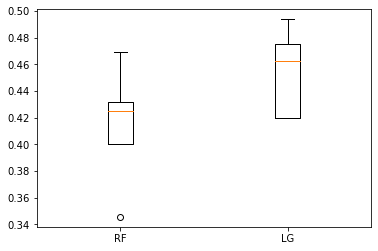

In [105]:
# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('LG', LogisticRegression(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, train_x, train_y,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(train_x,test_x, train_y, test_y)

                 model  Training_accuracy  Testing_accuracy
0        Random forest             100.00             49.50
1  Logistic Regression              45.91             43.56


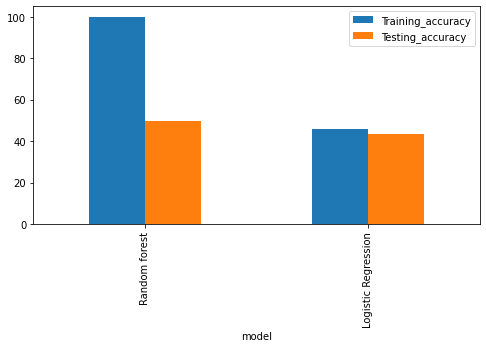

In [106]:
suit3 = { 'model': ['Random forest', 'Logistic Regression'], 'Training_accuracy': [radm_clf_training_score , logistic_training_score], 'Testing_accuracy': [radm_clf_testing_score, logistic_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))


### Suite2

In [107]:
train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.4,random_state=12)                                          

In [108]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

302
202
302
202


In [109]:
### RandomForest Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid={'n_estimators':np.arange(10,25)}

tree=GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_x,train_y)

tree.best_params_

# we can take n_estimators': 24
model = RandomForestClassifier(oob_score=True,n_estimators=24)
model.fit( train_x, train_y)

y_pred=model.predict(test_x)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

print(classificationreport)
print(confusionmatrix)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        14
           3       0.20      0.11      0.14        27
           4       0.32      0.34      0.33        58
           5       0.56      0.70      0.62        97

    accuracy                           0.45       202
   macro avg       0.22      0.23      0.22       202
weighted avg       0.39      0.45      0.41       202

[[ 0  0  1  3  2]
 [ 0  0  3  2  9]
 [ 0  2  3 12 10]
 [ 0  1  4 20 33]
 [ 0  0  4 25 68]]


C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
radm_clf_training_score = round(model.score(train_x, train_y)*100, 2)
radm_clf_testing_score = round(model.score(test_x, test_y)*100, 2)

print(radm_clf_training_score)
print(radm_clf_testing_score)

100.0
45.05


In [111]:
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


Training Accuracy : 1.0
Testing Accuracy : 0.4504950495049505


### Logistic Regression

In [112]:
Final_list=[#'Free_internet',
            'Helpful_votes', 
                'Hotel_name', 
            'No_of_hotelreviews',            
            'No_of_reviews',
            #'Pool',
            'Review_month', 
            'Review_weekday',
            #'User_continent',
            'hotelstar']

X_new = X[Final_list]

### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

vif.sort_values(by='VIF_Factor',ascending=False)

data_final = pd.concat([X_new, y], axis=1)

#split the data into train & test
train, test = train_test_split(data_final, test_size=0.4, random_state=123)

#Univariate Regression
model = smf.mnlogit('Score~Helpful_votes+No_of_reviews+No_of_hotelreviews+Hotel_name+Review_month+hotelstar+Review_weekday', train).fit()

print(model.summary())

model=LogisticRegression()

model.fit(train_x,train_y)

y_pred=model.predict(test_x)

classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

print(classificationreport)
print(confusionmatrix)

Optimization terminated successfully.
         Current function value: 1.150655
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:                  Score   No. Observations:                  302
Model:                        MNLogit   Df Residuals:                      270
Method:                           MLE   Df Model:                           28
Date:                Sun, 18 Oct 2020   Pseudo R-squ.:                 0.08023
Time:                        17:00:25   Log-Likelihood:                -347.50
converged:                       True   LL-Null:                       -377.81
Covariance Type:            nonrobust   LLR p-value:                 0.0003389
           Score=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.9078      3.465      1.416      0.157      -1.883      11.699
Help

C:\Users\marut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
logistic_training_score = round(model.score(train_x, train_y)*100, 2)
logistic_testing_score = round(model.score(test_x, test_y)*100, 2)

print(logistic_training_score)
print(logistic_testing_score)

50.0
44.55


In [114]:
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


Training Accuracy : 0.5
Testing Accuracy : 0.44554455445544555


RF 0.430327868852459
LG 0.44366120218579236
[array([0.52459016, 0.37704918, 0.4       , 0.5       , 0.35      ]), array([0.44262295, 0.45901639, 0.41666667, 0.43333333, 0.46666667])]
                 model  Training_accuracy  Testing_accuracy
0        Random forest              100.0             45.05
1  Logistic Regression               50.0             44.55


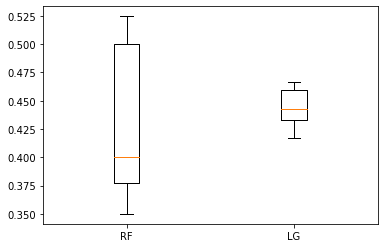

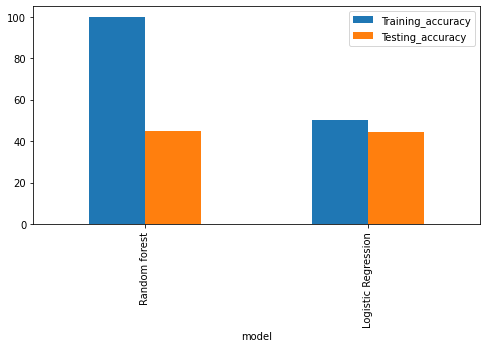

In [115]:

# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('LG', LogisticRegression(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, train_x, train_y,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(train_x,test_x, train_y, test_y)

suit3 = { 'model': ['Random forest', 'Logistic Regression'], 'Training_accuracy': [radm_clf_training_score , logistic_training_score], 'Testing_accuracy': [radm_clf_testing_score, logistic_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))


### Suite1

In [116]:
train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.5,random_state=12)                                              

print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

### RandomForest Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid={'n_estimators':np.arange(10,25)}

tree=GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_x,train_y)

tree.best_params_

# we can take n_estimators': 24
model = RandomForestClassifier(oob_score=True,n_estimators=24)
model.fit( train_x, train_y)

y_pred=model.predict(test_x)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

print(classificationreport)
print(confusionmatrix)

radm_clf_training_score = round(model.score(train_x, train_y)*100, 2)
radm_clf_testing_score = round(model.score(test_x, test_y)*100, 2)

print(radm_clf_training_score)
print(radm_clf_testing_score)
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


252
252
252
252
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        16
           3       0.43      0.14      0.21        42
           4       0.38      0.40      0.39        81
           5       0.54      0.76      0.63       107

    accuracy                           0.47       252
   macro avg       0.27      0.26      0.25       252
weighted avg       0.42      0.47      0.43       252

[[ 0  0  1  3  2]
 [ 0  0  0  8  8]
 [ 0  1  6 18 17]
 [ 0  1  5 32 43]
 [ 0  0  2 24 81]]
99.6
47.22
Training Accuracy : 0.996031746031746
Testing Accuracy : 0.4722222222222222


C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [117]:
Final_list=[#'Free_internet',
            'Helpful_votes', 
                'Hotel_name', 
            'No_of_hotelreviews',            
            'No_of_reviews',
            #'Pool',
            'Review_month', 
            'Review_weekday',
            #'User_continent',
            'hotelstar']

X_new = X[Final_list]

### VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

vif.sort_values(by='VIF_Factor',ascending=False)

data_final = pd.concat([X_new, y], axis=1)

#split the data into train & test
train, test = train_test_split(data_final, test_size=0.5, random_state=123)

#Univariate Regression
model = smf.mnlogit('Score~Helpful_votes+No_of_reviews+No_of_hotelreviews+Hotel_name+Review_month+hotelstar+Review_weekday', train).fit()

print(model.summary())

model=LogisticRegression()

model.fit(train_x,train_y)

y_pred=model.predict(test_x)

classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

print(classificationreport)
print(confusionmatrix)

Optimization terminated successfully.
         Current function value: 1.156836
         Iterations 13
                          MNLogit Regression Results                          
Dep. Variable:                  Score   No. Observations:                  252
Model:                        MNLogit   Df Residuals:                      220
Method:                           MLE   Df Model:                           28
Date:                Sun, 18 Oct 2020   Pseudo R-squ.:                 0.08675
Time:                        17:01:05   Log-Likelihood:                -291.52
converged:                       True   LL-Null:                       -319.22
Covariance Type:            nonrobust   LLR p-value:                  0.001528
           Score=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.0809      4.600      1.539      0.124      -1.934      16.096
Help

C:\Users\marut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
logistic_training_score = round(model.score(train_x, train_y)*100, 2)
logistic_testing_score = round(model.score(test_x, test_y)*100, 2)

print(logistic_training_score)
print(logistic_testing_score)

53.97
41.67


In [119]:
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


Training Accuracy : 0.5396825396825397
Testing Accuracy : 0.4166666666666667


RF 0.44823529411764707
LG 0.4838431372549019
[array([0.49019608, 0.45098039, 0.44      , 0.46      , 0.4       ]), array([0.52941176, 0.50980392, 0.42      , 0.48      , 0.48      ])]
                 model  Training_accuracy  Testing_accuracy
0        Random forest              99.60             47.22
1  Logistic Regression              53.97             41.67


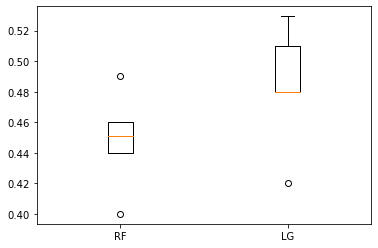

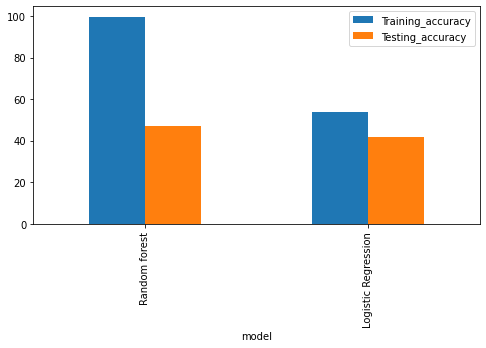

In [120]:

# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('LG', LogisticRegression(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, train_x, train_y,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(train_x,test_x, train_y, test_y)

suit3 = { 'model': ['Random forest', 'Logistic Regression'], 'Training_accuracy': [radm_clf_training_score , logistic_training_score], 'Testing_accuracy': [radm_clf_testing_score, logistic_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))


### KNN Classifier

### Suite1

In [121]:
train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.5,random_state=12)                                              

print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

252
252
252
252


In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
model=KNeighborsClassifier(n_neighbors=7).fit(train_x,train_y)

In [124]:
accuracy=model.score(test_x,test_y)

In [125]:
accuracy

0.3888888888888889

In [126]:
knn_predictions = model.predict(test_x)  
cm = confusion_matrix(test_y, knn_predictions)

In [127]:
y_pred=model.predict(test_x)

In [128]:
classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

print(classificationreport)
print(confusionmatrix)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        16
           3       0.16      0.14      0.15        42
           4       0.32      0.30      0.31        81
           5       0.49      0.64      0.55       107

    accuracy                           0.39       252
   macro avg       0.19      0.21      0.20       252
weighted avg       0.34      0.39      0.36       252

[[ 0  0  0  3  3]
 [ 0  0  1  7  8]
 [ 0  0  6 18 18]
 [ 0  0 14 24 43]
 [ 0  0 16 23 68]]


C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
knn_training_score = round(model.score(train_x, train_y)*100, 2)
knn_testing_score = round(model.score(test_x, test_y)*100, 2)

print(knn_training_score)
print(knn_testing_score)

56.35
38.89


In [130]:
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


Training Accuracy : 0.5634920634920635
Testing Accuracy : 0.3888888888888889


In [131]:
from sklearn.gaussian_process import GaussianProcessClassifier
model =  GaussianProcessClassifier(random_state = 0)
model.fit(train_x, train_y)

y_pred = model.predict(test_x)
gp_training_score = round(model.score(train_x, train_y)*100, 2)
gp_testing_score = round(model.score(test_x, test_y)*100, 2)
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))

# confusion matrix
cm = confusion_matrix(test_y, y_pred)

# classification report
cr = classification_report(test_y, y_pred)
print(cr)


Training Accuracy : 1.0
Testing Accuracy : 0.4365079365079365
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        16
           3       0.50      0.02      0.05        42
           4       0.50      0.05      0.09        81
           5       0.44      0.98      0.60       107

    accuracy                           0.44       252
   macro avg       0.29      0.21      0.15       252
weighted avg       0.43      0.44      0.29       252



C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GP 0.46839215686274505
KNN 0.41254901960784307
[array([0.43137255, 0.47058824, 0.48      , 0.5       , 0.46      ]), array([0.47058824, 0.39215686, 0.38      , 0.46      , 0.36      ])]
            model  Training_accuracy  Testing_accuracy
0        Guassian             100.00             43.65
1  KNN Classifier              56.35             38.89


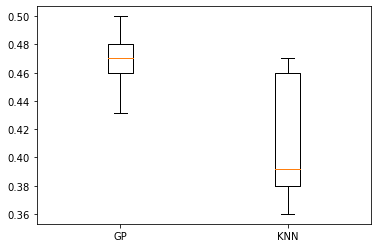

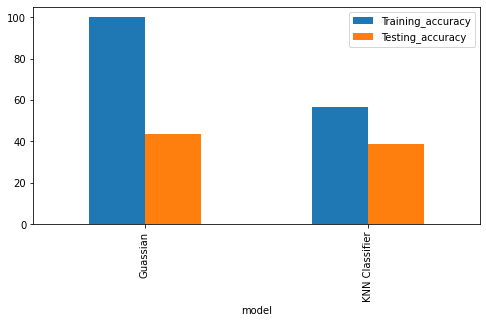

In [132]:

# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('GP', GaussianProcessClassifier(random_state = 0)) )
    models.append( ('KNN', KNeighborsClassifier()) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, train_x, train_y,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(train_x,test_x, train_y, test_y)

suit3 = { 'model': ['Guassian', 'KNN Classifier'], 'Training_accuracy': [gp_training_score , knn_training_score], 'Testing_accuracy': [gp_testing_score, knn_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))


### Suite2

In [133]:


train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.4,random_state=12)                                              

print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=7).fit(train_x,train_y)

accuracy=model.score(test_x,test_y)

accuracy

knn_predictions = model.predict(test_x)  
cm = confusion_matrix(test_y, knn_predictions)

y_pred=model.predict(test_x)

classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

print(classificationreport)
print(confusionmatrix)

knn_training_score = round(model.score(train_x, train_y)*100, 2)
knn_testing_score = round(model.score(test_x, test_y)*100, 2)

print(knn_training_score)
print(knn_testing_score)

# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


from sklearn.gaussian_process import GaussianProcessClassifier
model =  GaussianProcessClassifier(random_state = 0)
model.fit(train_x, train_y)

y_pred = model.predict(test_x)
gp_training_score = round(model.score(train_x, train_y)*100, 2)
gp_testing_score = round(model.score(test_x, test_y)*100, 2)
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))

# confusion matrix
cm = confusion_matrix(test_y, y_pred)

# classification report
cr = classification_report(test_y, y_pred)
print(cr)




302
202
302
202
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        14
           3       0.31      0.44      0.36        27
           4       0.33      0.36      0.35        58
           5       0.53      0.55      0.54        97

    accuracy                           0.43       202
   macro avg       0.23      0.27      0.25       202
weighted avg       0.39      0.43      0.41       202

[[ 0  0  0  3  3]
 [ 0  0  0  4 10]
 [ 0  0 12  7  8]
 [ 0  0 11 21 26]
 [ 0  0 16 28 53]]
55.96
42.57
Training Accuracy : 0.5596026490066225
Testing Accuracy : 0.42574257425742573


C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy : 1.0
Testing Accuracy : 0.46534653465346537
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        14
           3       0.50      0.04      0.07        27
           4       0.22      0.03      0.06        58
           5       0.48      0.94      0.64        97

    accuracy                           0.47       202
   macro avg       0.24      0.20      0.15       202
weighted avg       0.36      0.47      0.33       202



C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GP 0.4305464480874317
KNN 0.39087431693989066
[array([0.40983607, 0.42622951, 0.43333333, 0.45      , 0.43333333]), array([0.37704918, 0.36065574, 0.35      , 0.45      , 0.41666667])]
            model  Training_accuracy  Testing_accuracy
0        Guassian             100.00             46.53
1  KNN Classifier              55.96             42.57


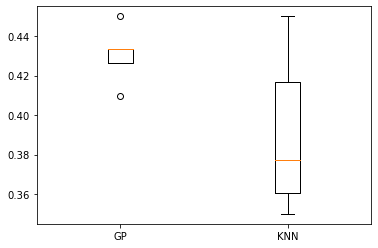

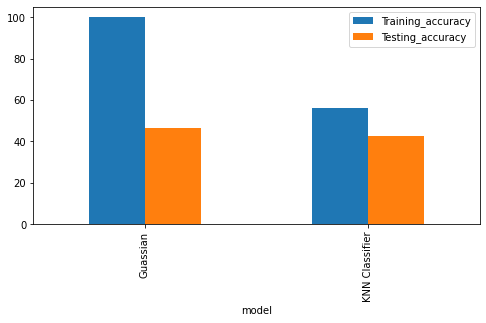

In [134]:

# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('GP', GaussianProcessClassifier(random_state = 0)) )
    models.append( ('KNN', KNeighborsClassifier()) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, train_x, train_y,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(train_x,test_x, train_y, test_y)

suit3 = { 'model': ['Guassian', 'KNN Classifier'], 'Training_accuracy': [gp_training_score , knn_training_score], 'Testing_accuracy': [gp_testing_score, knn_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))


### Suite3

### KNN and Guassion

403
101
403
101
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.35      0.58      0.44        12
           4       0.30      0.27      0.28        30
           5       0.59      0.64      0.62        50

    accuracy                           0.47       101
   macro avg       0.25      0.30      0.27       101
weighted avg       0.42      0.47      0.44       101

[[ 0  0  1  2  1]
 [ 0  0  1  1  3]
 [ 0  0  7  2  3]
 [ 0  0  7  8 15]
 [ 0  0  4 14 32]]
52.85
46.53
Training Accuracy : 0.5285359801488834
Testing Accuracy : 0.46534653465346537


C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Accuracy : 1.0
Testing Accuracy : 0.48514851485148514
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.50      0.08      0.14        12
           4       0.17      0.03      0.06        30
           5       0.51      0.94      0.66        50

    accuracy                           0.49       101
   macro avg       0.24      0.21      0.17       101
weighted avg       0.36      0.49      0.36       101



C:\Users\marut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GP 0.4343518518518518
KNN 0.34496913580246913
[array([0.41975309, 0.41975309, 0.41975309, 0.4625    , 0.45      ]), array([0.33333333, 0.39506173, 0.28395062, 0.4       , 0.3125    ])]
            model  Training_accuracy  Testing_accuracy
0        Guassian             100.00             48.51
1  KNN Classifier              52.85             46.53


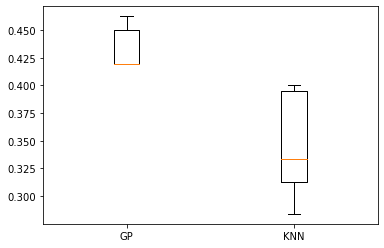

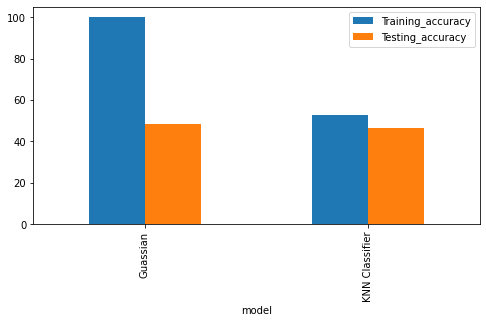

In [135]:


train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.2,random_state=12)                                              

print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=7).fit(train_x,train_y)

accuracy=model.score(test_x,test_y)

accuracy

knn_predictions = model.predict(test_x)  
cm = confusion_matrix(test_y, knn_predictions)

y_pred=model.predict(test_x)

classificationreport=classification_report(test_y,y_pred)
confusionmatrix=confusion_matrix(test_y,y_pred)

print(classificationreport)
print(confusionmatrix)

knn_training_score = round(model.score(train_x, train_y)*100, 2)
knn_testing_score = round(model.score(test_x, test_y)*100, 2)

print(knn_training_score)
print(knn_testing_score)

# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))


from sklearn.gaussian_process import GaussianProcessClassifier
model =  GaussianProcessClassifier(random_state = 0)
model.fit(train_x, train_y)

y_pred = model.predict(test_x)
gp_training_score = round(model.score(train_x, train_y)*100, 2)
gp_testing_score = round(model.score(test_x, test_y)*100, 2)
# evaluating the model
print("Training Accuracy :", model.score(train_x, train_y))
print("Testing Accuracy :", model.score(test_x, test_y))

# confusion matrix
cm = confusion_matrix(test_y, y_pred)

# classification report
cr = classification_report(test_y, y_pred)
print(cr)





# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('GP', GaussianProcessClassifier(random_state = 0)) )
    models.append( ('KNN', KNeighborsClassifier()) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, train_x, train_y,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(train_x,test_x, train_y, test_y)

suit3 = { 'model': ['Guassian', 'KNN Classifier'], 'Training_accuracy': [gp_training_score , knn_training_score], 'Testing_accuracy': [gp_testing_score, knn_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))




### Comparing RandamForest,LogisticRegression,KNNClassifier,Guassian

RF 0.4143827160493827
LG 0.4541666666666666
GP 0.4343518518518518
KNN 0.34496913580246913
[array([0.34567901, 0.4691358 , 0.43209877, 0.425     , 0.4       ]), array([0.41975309, 0.41975309, 0.49382716, 0.475     , 0.4625    ]), array([0.41975309, 0.41975309, 0.41975309, 0.4625    , 0.45      ]), array([0.33333333, 0.39506173, 0.28395062, 0.4       , 0.3125    ])]
            model  Training_accuracy  Testing_accuracy
0    RandamForest              99.60             47.22
1        Logistic              53.97             41.67
2        Guassian             100.00             48.51
3  KNN Classifier              52.85             46.53


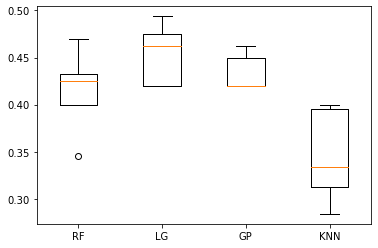

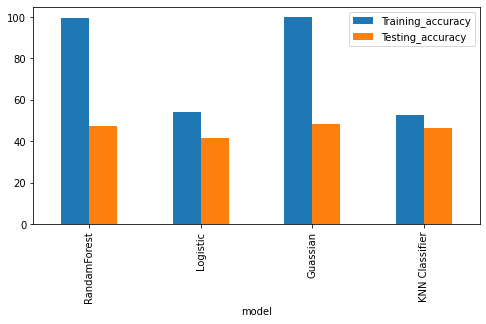

In [136]:

# making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('LG', LogisticRegression(random_state = 0)) )
    models.append( ('GP', GaussianProcessClassifier(random_state = 0)) )
    models.append( ('KNN', KNeighborsClassifier()) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, train_x, train_y,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(train_x,test_x, train_y, test_y)

suit3 = { 'model': ['RandamForest','Logistic','Guassian', 'KNN Classifier'], 'Training_accuracy': [radm_clf_training_score,logistic_training_score,gp_training_score , knn_training_score], 'Testing_accuracy': [radm_clf_testing_score,logistic_testing_score,gp_testing_score, knn_testing_score] }
suit3_c = pd.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "bar", figsize=(8,4))
